In [ ]:
# Importo il datatset denominato owid-covid-data in csv e verifico le prime 10 righe del dataframe

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("owid-covid-data.csv")

In [93]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


# Verifico le dimensioni del dataframe

In [6]:
df.shape

(384091, 67)

# Verifico le diciture presenti nell'intestazione

In [94]:
df.columns.values.tolist()

['iso_code',
 'continent',
 'location',
 'date',
 'total_cases',
 'new_cases',
 'new_cases_smoothed',
 'total_deaths',
 'new_deaths',
 'new_deaths_smoothed',
 'total_cases_per_million',
 'new_cases_per_million',
 'new_cases_smoothed_per_million',
 'total_deaths_per_million',
 'new_deaths_per_million',
 'new_deaths_smoothed_per_million',
 'reproduction_rate',
 'icu_patients',
 'icu_patients_per_million',
 'hosp_patients',
 'hosp_patients_per_million',
 'weekly_icu_admissions',
 'weekly_icu_admissions_per_million',
 'weekly_hosp_admissions',
 'weekly_hosp_admissions_per_million',
 'total_tests',
 'new_tests',
 'total_tests_per_thousand',
 'new_tests_per_thousand',
 'new_tests_smoothed',
 'new_tests_smoothed_per_thousand',
 'positive_rate',
 'tests_per_case',
 'tests_units',
 'total_vaccinations',
 'people_vaccinated',
 'people_fully_vaccinated',
 'total_boosters',
 'new_vaccinations',
 'new_vaccinations_smoothed',
 'total_vaccinations_per_hundred',
 'people_vaccinated_per_hundred',
 'peo

# Verifichiamo la tipologia dei dati

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384091 entries, 0 to 384090
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    384091 non-null  object 
 1   continent                                   365633 non-null  object 
 2   location                                    384091 non-null  object 
 3   date                                        384091 non-null  object 
 4   total_cases                                 344917 non-null  float64
 5   new_cases                                   372892 non-null  float64
 6   new_cases_smoothed                          371662 non-null  float64
 7   total_deaths                                322777 non-null  float64
 8   new_deaths                                  373187 non-null  float64
 9   new_deaths_smoothed                         371957 non-null  float64
 

## Determino i casi totali per continente

In [96]:
continent_totalcases=df.groupby("continent")["new_cases"].sum()

In [97]:
continent_totalcases

continent
Africa            13140432.0
Asia             301426766.0
Europe           252322670.0
North America    124525279.0
Oceania           14791186.0
South America     68695341.0
Name: new_cases, dtype: float64

## Prendo 2  continenti e confronto i seguenti descrittori statistici: valori minimo e massimo, media, e percentuale rispetto al numero dei casi totali nel mondo

In [98]:
europe=df[df["continent"]=="Europe"]

In [99]:
europe_tot=europe.groupby(["continent"])["new_cases"].sum()
print(europe_tot)

continent
Europe    252322670.0
Name: new_cases, dtype: float64


In [101]:
europe_perc=europe_tot/ continent_totalcases.sum()
print(europe_perc)

continent
Europe    0.325619
Name: new_cases, dtype: float64


In [102]:
europe_data=europe.groupby(["continent"])["new_cases"].agg(["sum","max","min","mean"]).round()
print(europe_data)

                   sum        max  min    mean
continent                                     
Europe     252322670.0  2417043.0  0.0  3286.0


## Unisco i dati statistici e la percentuale in un uncia tabella denominata eu

In [103]:
eu=pd.merge(europe_perc,europe_data,on="continent")
print(eu)

           new_cases          sum        max  min    mean
continent                                                
Europe      0.325619  252322670.0  2417043.0  0.0  3286.0


## Eseguo le stesse operazioni per l'oceania

In [104]:
oceania=df[df["continent"]=="Oceania"]

In [105]:
oceania_tot=oceania.groupby(["continent"])["new_cases"].sum()
print(oceania_tot)

continent
Oceania    14791186.0
Name: new_cases, dtype: float64


In [106]:
oceania_perc=oceania_tot/ continent_totalcases.sum()
print(oceania_perc)

continent
Oceania    0.019088
Name: new_cases, dtype: float64


In [107]:
oceania_data=oceania.groupby(["continent"])["new_cases"].agg(["sum","max","min","mean"]).round()
print(oceania_data)

                  sum       max  min   mean
continent                                  
Oceania    14791186.0  588813.0  0.0  405.0


In [63]:
oc=pd.merge(oceania_perc,oceania_data,on="continent")
print(oc)

           new_cases         sum       max  min   mean
continent                                             
Oceania     0.019088  14791186.0  588813.0  0.0  405.0


## Prendo in esame i dati covid relativi all'Italia nel 2022, e mostro con un grafico: 1)l'evoluzione dei casi totali, 2) il numero di nuovi casi rispetto alla data 3) l'andamento della somma cumulativa dei nuovi casi del 2022

In [111]:
italia_22=df[(df["location"]=="Italy")&(df["date"].str.startswith("2022"))]

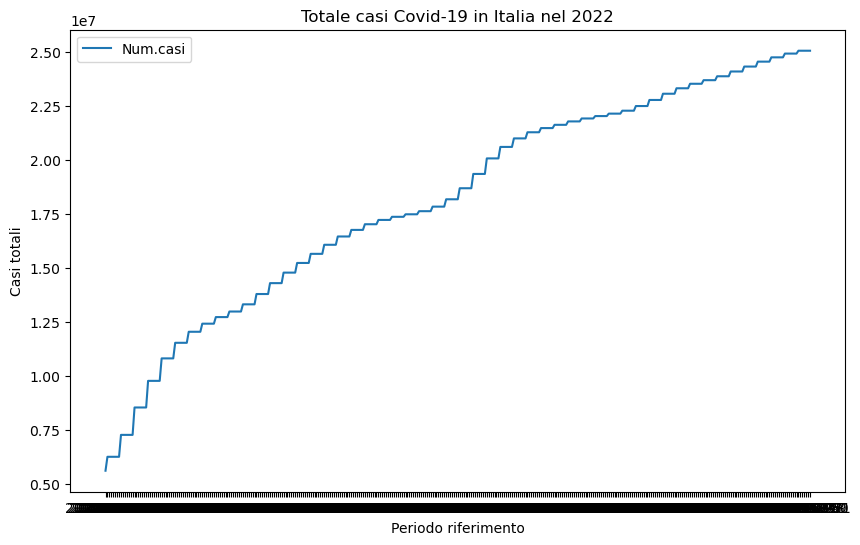

In [114]:
plt.figure(figsize=(10, 6))
plt.plot(italia_22["date"], italia_22["total_cases"], label="Num.casi")
plt.xlabel("Periodo riferimento")
plt.ylabel("Casi totali")
plt.title("Totale casi Covid-19 in Italia nel 2022")
plt.legend()
plt.show()

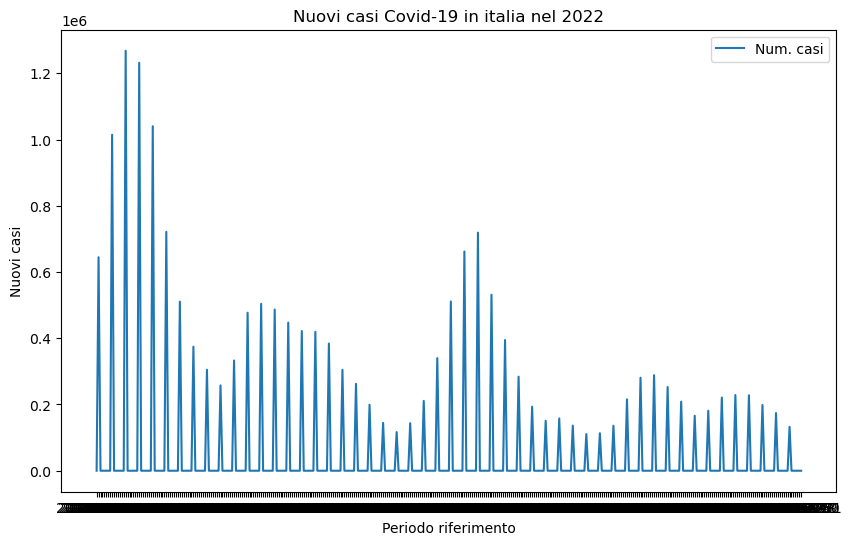

In [115]:
plt.figure(figsize=(10, 6))
plt.plot(italia_22["date"], italia_22["new_cases"], label="Num. casi")
plt.xlabel("Periodo riferimento")
plt.ylabel("Nuovi casi")
plt.title("Nuovi casi Covid-19 in italia nel 2022")
plt.legend()
plt.show()

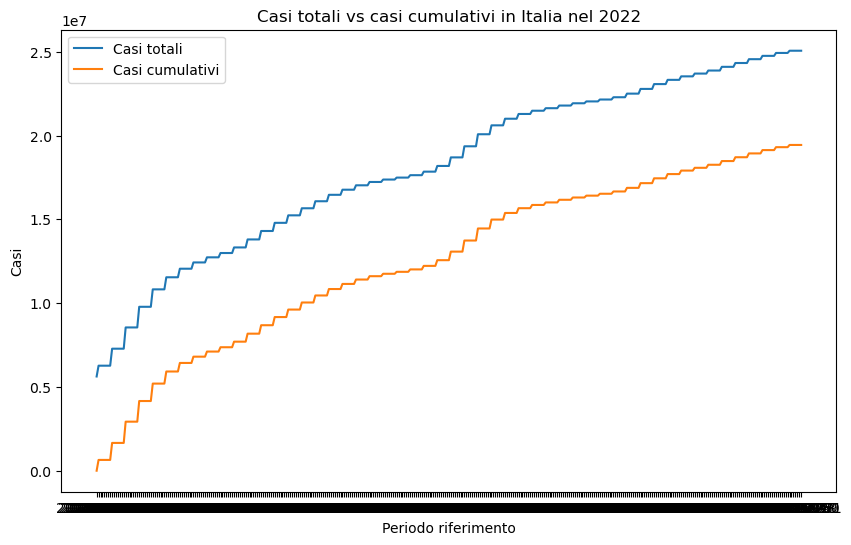

In [116]:
ita_andamento=italia_22["new_cases"].cumsum()
plt.figure(figsize=(10, 6))
plt.plot(italia_22["date"], italia_22["total_cases"], label="Casi totali")
plt.plot(italia_22["date"], ita_andamento, label="Casi cumulativi")
plt.xlabel("Periodo riferimento")
plt.ylabel("Casi")
plt.title("Casi totali vs casi cumulativi in Italia nel 2022")
plt.legend()
plt.show()

## I casi totali ed i casi cumulativi seguono lo stesso andamento ed entrambe mostrano un picco intorno alla fine dell'anno (nov-dic) per poi tornare ad essere costante. 

## Filtro il dataframe per gli stati Italia, Germania e Francia, e mostro in un boxplot la differenza tra queste nazioni riguardo il  numero di pazienti in terapia intensiva (Intensive Care Unit, ICU) da maggio 2022 (incluso) ad aprile 2023 (incluso)

In [154]:
igf_data_mediana=igf_data.groupby(["location"])["icu_patients"].median().round()
igf_data_mediana

location
France     972.0
Germany    994.0
Italy      227.0
Name: icu_patients, dtype: float64

In [153]:
igf_data_media=igf_data.groupby(["location"])["icu_patients"].mean().round()
igf_data_media

location
France      998.0
Germany    1022.0
Italy       231.0
Name: icu_patients, dtype: float64

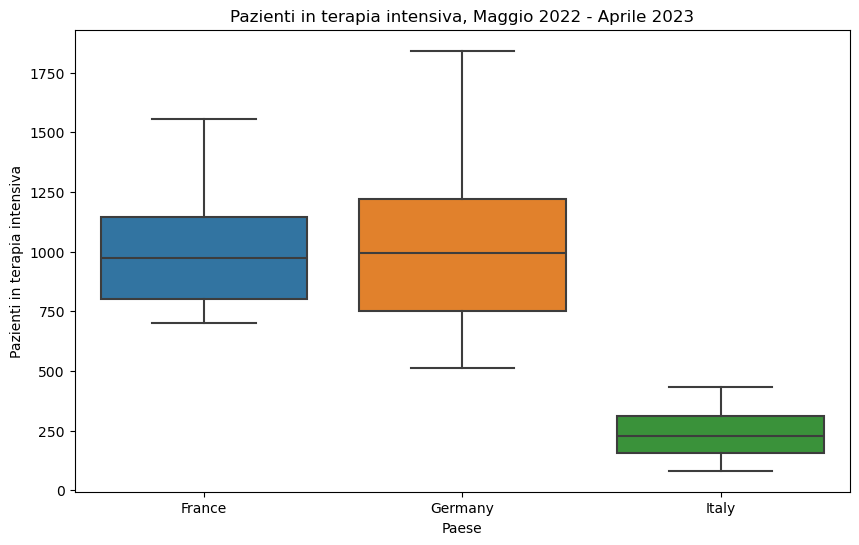

In [151]:
igf_data=df[(df["location"].isin(["Italy", "Germany", "France"])) & (df["date"].between("2022-05-01", "2023-04-30"))]
plt.figure(figsize=(10, 6))
sns.boxplot(x="location", y='icu_patients', data=igf_data)
plt.title("Pazienti in terapia intensiva, Maggio 2022 - Aprile 2023")
plt.xlabel("Paese")
plt.ylabel("Pazienti in terapia intensiva")
plt.show()

## I boxplot dimostrano che Francia e Germania hanno avuto un valore mediano di pazienti in terapia intensiva più alto rispetto all'Italia, ma quest'ultima è la nazione con una distribuzione perfettamente simmetrica, infatti la mediana si colloca esattamente in posizione centrale rispetto alla scatola, ovvero alla stessa distanza tra primo e terzo quartile e la media (231) coincide con la mediana (227). La Francia e la Germania presentano una asimmetria, cioè una tendenza dei dati a disperdersi verso valori più grandi rispetto a quello centrale.

In [139]:
igfs_data=df[(df["location"].isin(["Italy", "Germany", "France","Spain"])) & (df["date"].between("2023-01-01", "2023-12-31"))]
igfs_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
116679,FRA,Europe,France,2023-01-01,38141254.0,151707.0,21672.429,162475.0,808.0,115.429,...,35.6,NaN,5.98,82.66,0.901,67813000.0,122180.83,6.64,25.88,1886.7708
116680,FRA,Europe,France,2023-01-02,38141254.0,0.0,21672.429,162475.0,0.0,115.429,...,35.6,NaN,5.98,82.66,0.901,67813000.0,NaN,NaN,NaN,NaN
116681,FRA,Europe,France,2023-01-03,38141254.0,0.0,21672.429,162475.0,0.0,115.429,...,35.6,NaN,5.98,82.66,0.901,67813000.0,NaN,NaN,NaN,NaN
116682,FRA,Europe,France,2023-01-04,38141254.0,0.0,21672.429,162475.0,0.0,115.429,...,35.6,NaN,5.98,82.66,0.901,67813000.0,NaN,NaN,NaN,NaN
116683,FRA,Europe,France,2023-01-05,38141254.0,0.0,21672.429,162475.0,0.0,115.429,...,35.6,NaN,5.98,82.66,0.901,67813000.0,NaN,NaN,NaN,NaN


In [181]:
igfs_totalcases=igfs_data.groupby(["location"])["hosp_patients"].sum()

In [180]:
igfs_totalcases

location
France      90
Germany      0
Italy      365
Spain      162
Name: hosp_patients, dtype: int64

In [190]:
for column in igfs_data.columns:
    nan_count_igfs=igfs_data[column].isna().sum()
    nan_percentage_igf=round((nan_count_igfs/igfs_data.shape[0])*100,2)
    print(f"{column}contains{nan_count_igfs} NaN values, {nan_percentage_igf}% of all raws.")

iso_codecontains0 NaN values, 0.0% of all raws.
continentcontains0 NaN values, 0.0% of all raws.
locationcontains0 NaN values, 0.0% of all raws.
datecontains0 NaN values, 0.0% of all raws.
total_casescontains0 NaN values, 0.0% of all raws.
new_casescontains533 NaN values, 36.51% of all raws.
new_cases_smoothedcontains533 NaN values, 36.51% of all raws.
total_deathscontains0 NaN values, 0.0% of all raws.
new_deathscontains533 NaN values, 36.51% of all raws.
new_deaths_smoothedcontains533 NaN values, 36.51% of all raws.
total_cases_per_millioncontains0 NaN values, 0.0% of all raws.
new_cases_per_millioncontains533 NaN values, 36.51% of all raws.
new_cases_smoothed_per_millioncontains533 NaN values, 36.51% of all raws.
total_deaths_per_millioncontains0 NaN values, 0.0% of all raws.
new_deaths_per_millioncontains533 NaN values, 36.51% of all raws.
new_deaths_smoothed_per_millioncontains533 NaN values, 36.51% of all raws.
reproduction_ratecontains1452 NaN values, 99.45% of all raws.
icu_pat

## La colonna hosp_patients presenta 843 valori nulli: "hosp_patientscontains 843 NaN values, 57.74% of all raws". In questo caso di può procedere alla eliminazione e/o ssotituzione dei dati nulli al fine di poter effettuare una analisi accurata. 